In [2]:
import pandas as pd
data = pd.read_csv('../Data/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Missing values

In [5]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
data.shape

(53940, 10)

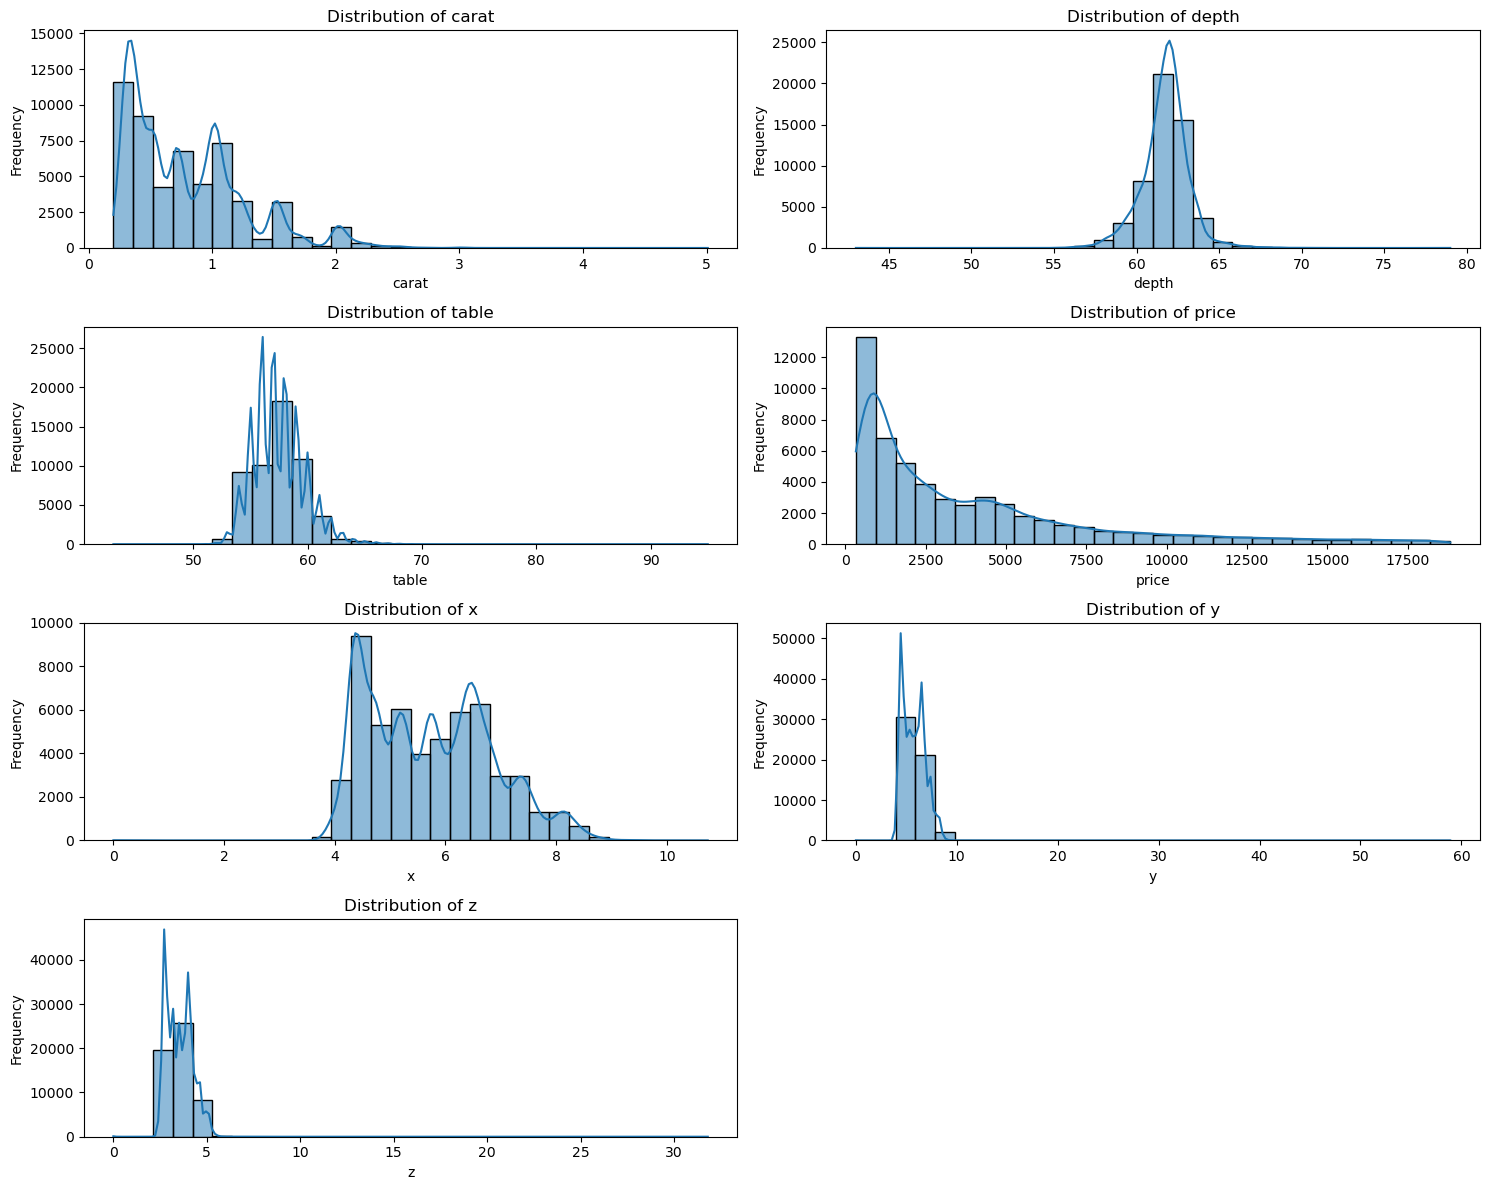

In [8]:
# Histrograms of all 
# Load the diamonds dataset
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to create histograms
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Set the size of the plot grid
plt.figure(figsize=(15, 12))

# Loop through each feature and create a histogram
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

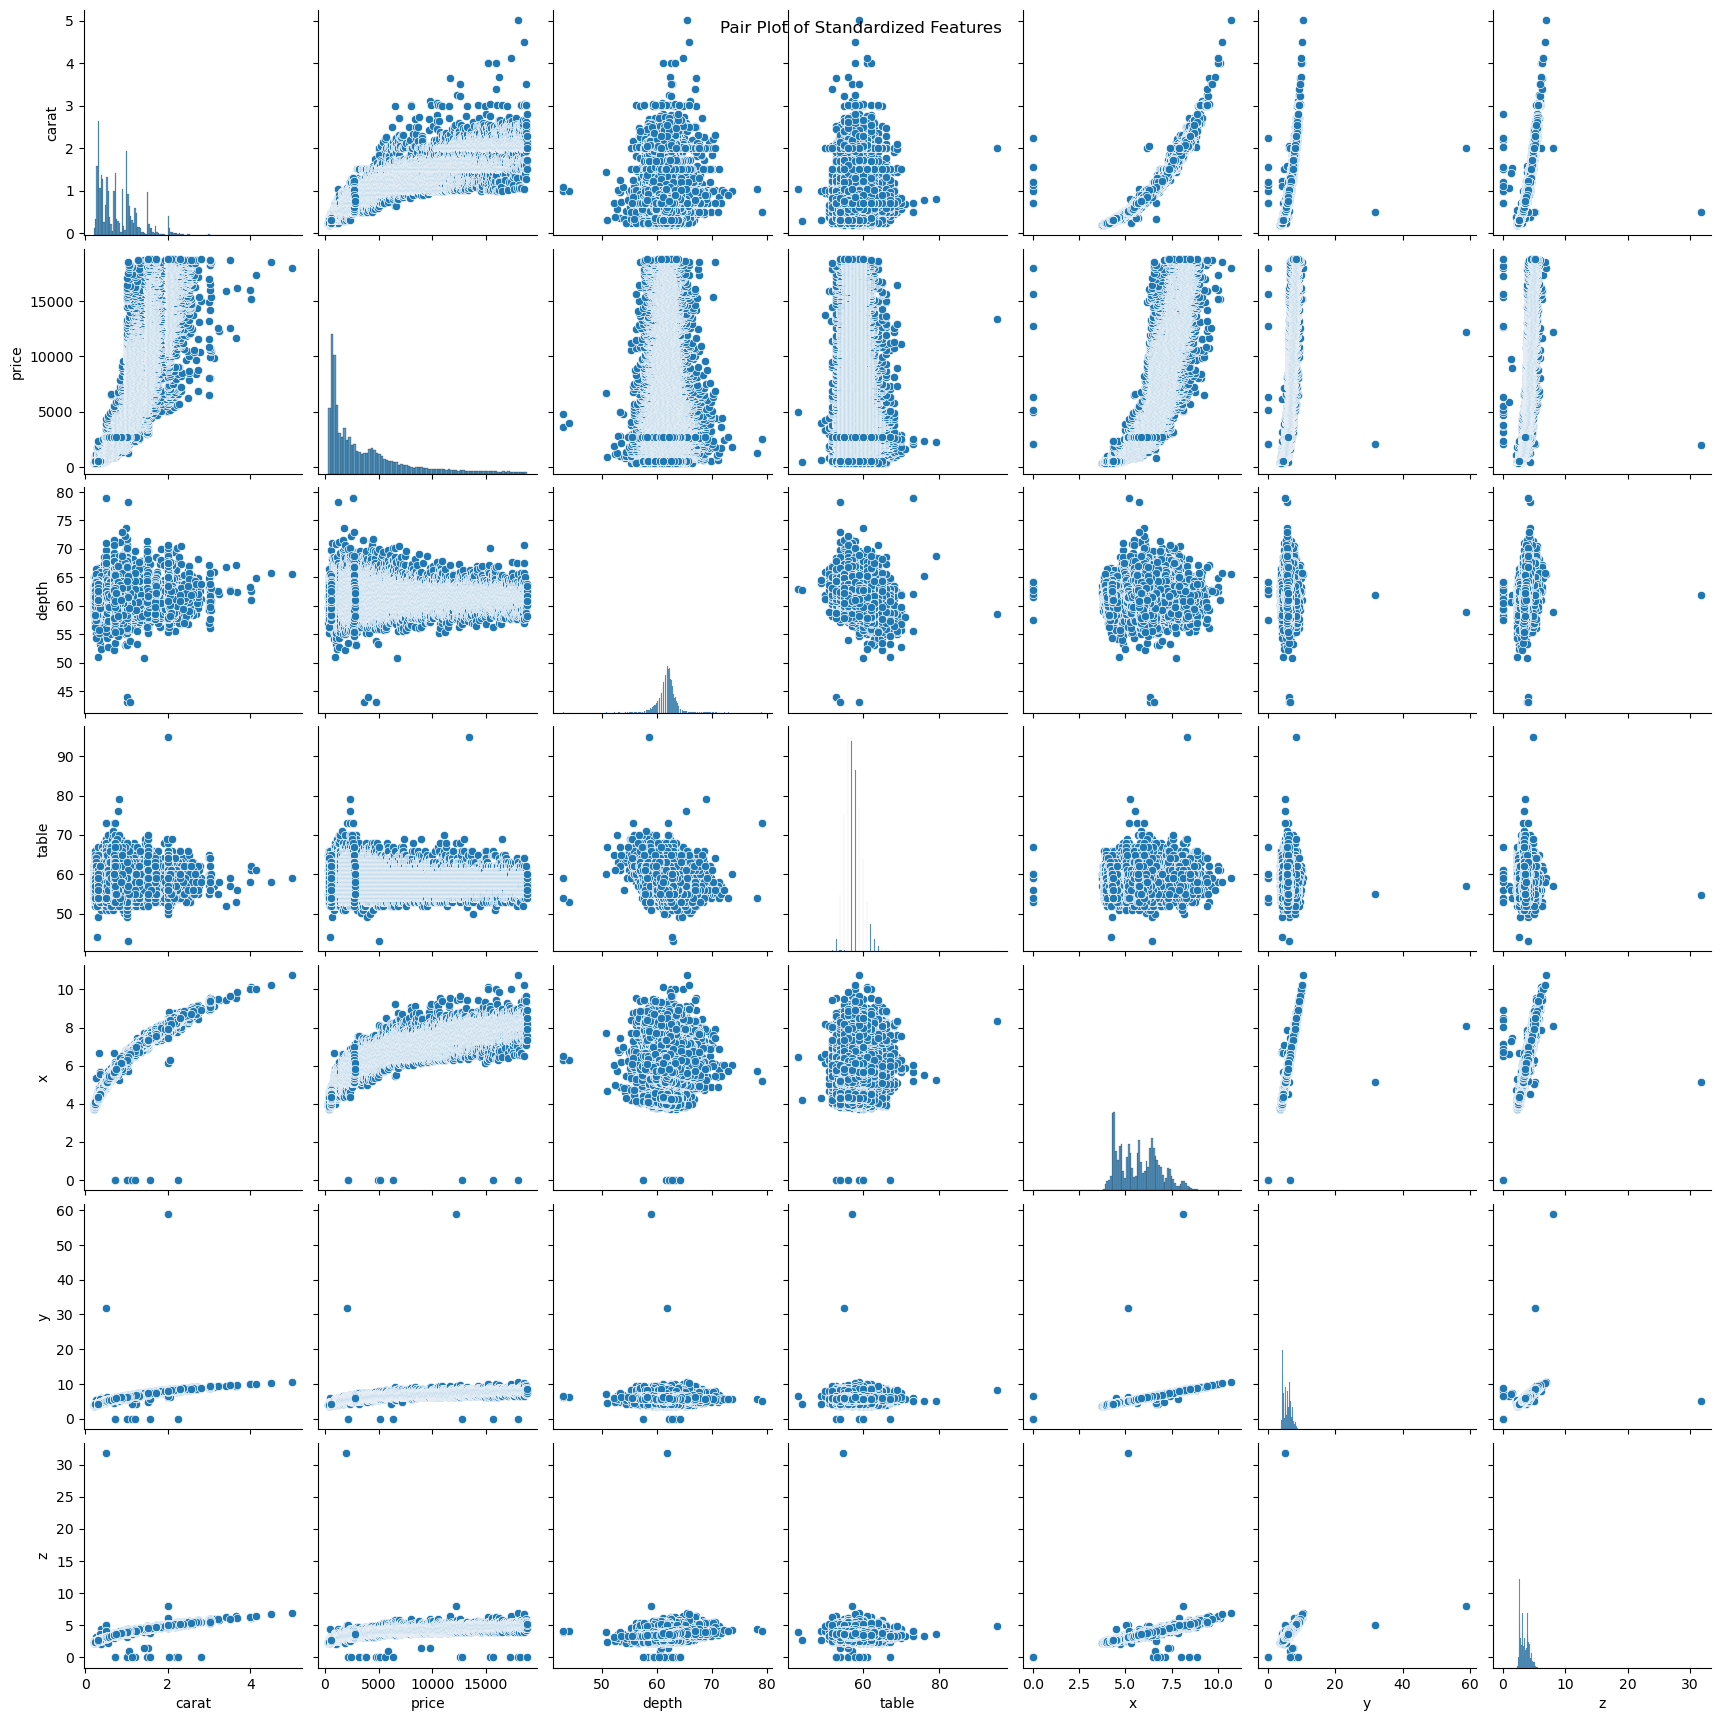

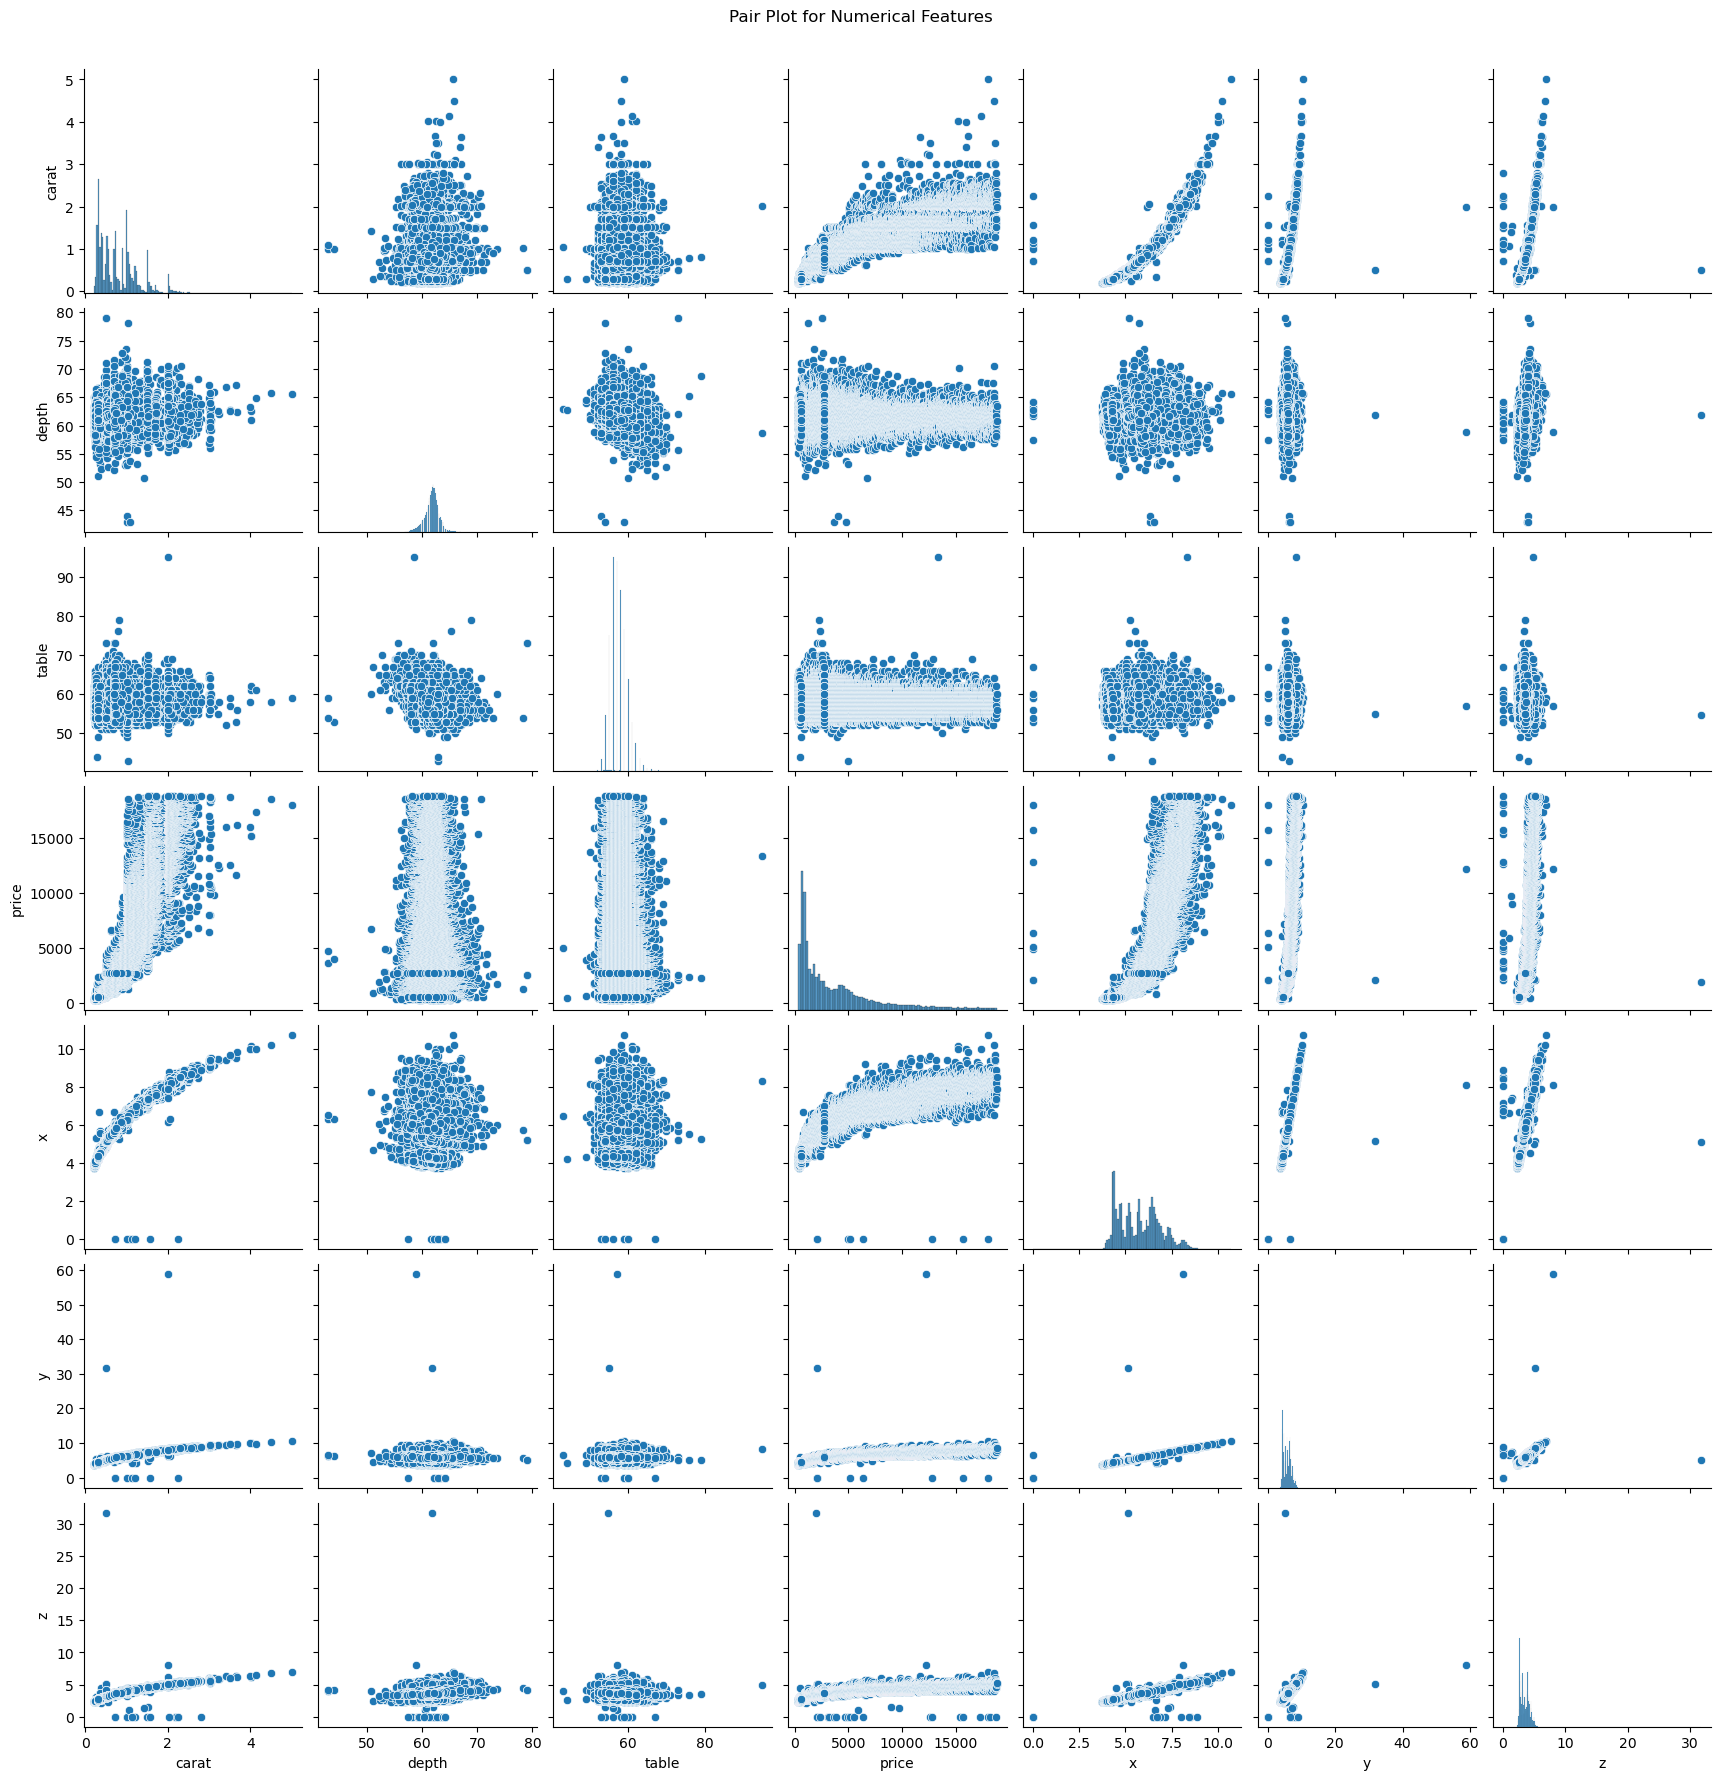

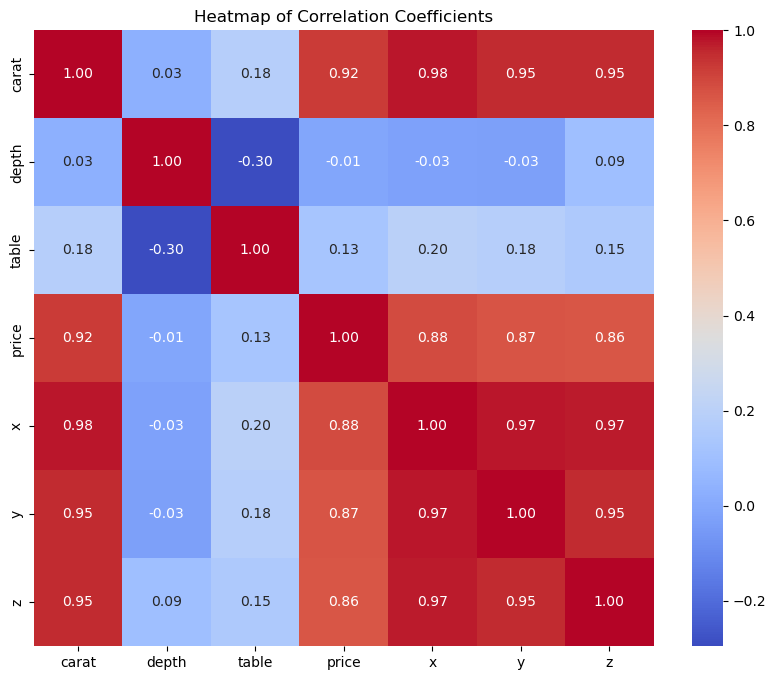

In [9]:
# Pair plot for selected standardized features
sns.pairplot(data[['carat', 'price', 'depth', 'table','x', 'y', 'z']])
plt.suptitle('Pair Plot of Standardized Features')
plt.show()


# Select the relevant numerical features for correlation analysis
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Generate the pair plot for the selected features
sns.pairplot(data[numerical_features])
plt.suptitle('Pair Plot for Numerical Features', y=1.02)  # Title with some vertical space
plt.show()


# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Coefficients')
plt.show()


# Outliers

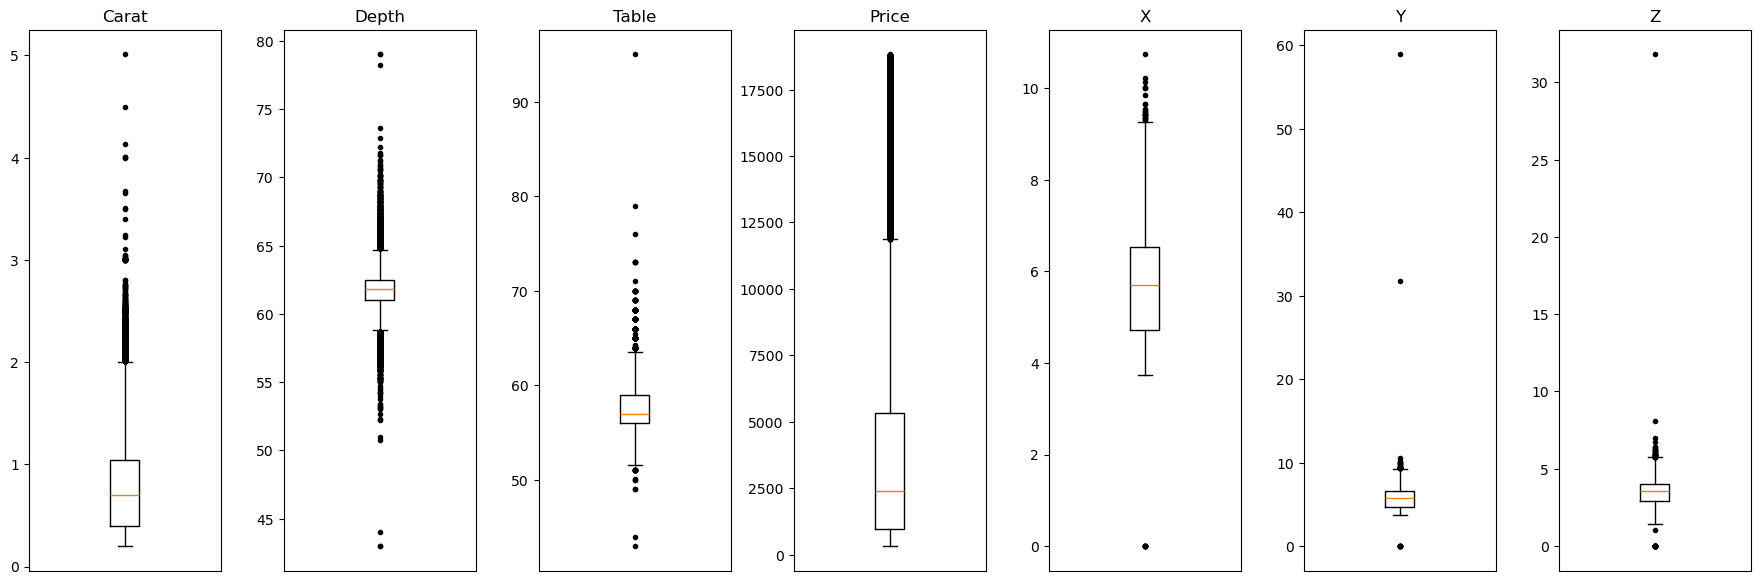

In [10]:
import matplotlib.pyplot as plt

# List of numerical columns from your dataset
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create subplots: 1 row and 7 columns (one for each numerical feature)
fig, axes = plt.subplots(1, 7, figsize=(18, 6))  # Removed 'sharey=True' to give each plot its own y-axis

# Adjust the layout to avoid overlap
fig.tight_layout()

# Create box plots for each numerical column and adjust their appearance
for ax, col in zip(axes, numerical_columns):
    ax.boxplot(data[col], sym="k.")  # sym="k." uses black dots for outliers
    ax.set_title(col.capitalize())  # Set the title to the column name
    ax.set_xticks([])  # Remove x-tick labels for a cleaner look

# Display the plots
plt.show()


#### Standardize the values

In [11]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation for each numerical feature
diamonds_data = pd.read_csv('../Data/diamonds.csv')

means = diamonds_data[numerical_columns].mean()
stds = diamonds_data[numerical_columns].std()

# Display the means and standard deviations
print("Means:\n", means)
print("\nStandard Deviations:\n", stds)

# Manually standardizing the numerical features
diamonds_data_standardized = diamonds_data[numerical_columns].copy()

for column in numerical_columns:
    diamonds_data_standardized[column] = (diamonds_data[column] - means[column]) / stds[column]

# Display the first few rows of the manually standardized data
print(diamonds_data_standardized.head())

Means:
 carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

Standard Deviations:
 carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64
      carat     depth     table     price         x         y         z
0 -1.198157 -0.174090 -1.099662 -0.904087 -1.587823 -1.536181 -1.571115
1 -1.240350 -1.360726  1.585514 -0.904087 -1.641310 -1.658759 -1.741159
2 -1.198157 -3.384987  3.375631 -0.903836 -1.498677 -1.457382 -1.741159
3 -1.071577  0.454129  0.242926 -0.902081 -1.364959 -1.317293 -1.287708
4 -1.029384  1.082348  0.242926 -0.901831 -1.240155 -1.212227 -1.117663


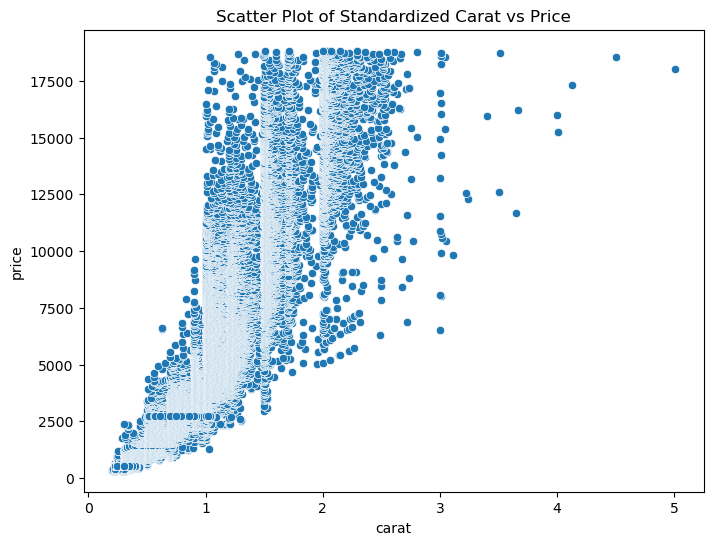

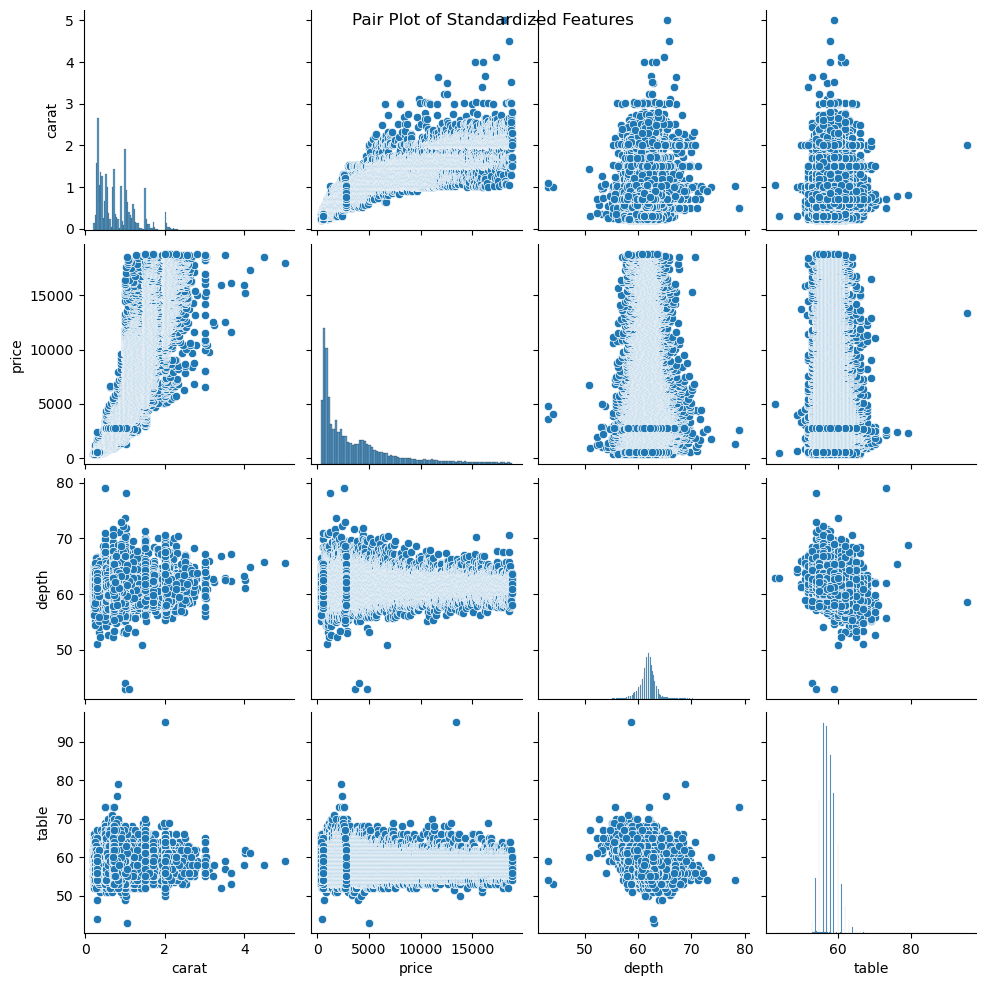

In [12]:
# Scatter plot between carat and price after standardization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=data)
plt.title('Scatter Plot of Standardized Carat vs Price')
plt.show()

# Pair plot for selected standardized features
sns.pairplot(data[['carat', 'price', 'depth', 'table']])
plt.suptitle('Pair Plot of Standardized Features')
plt.show()


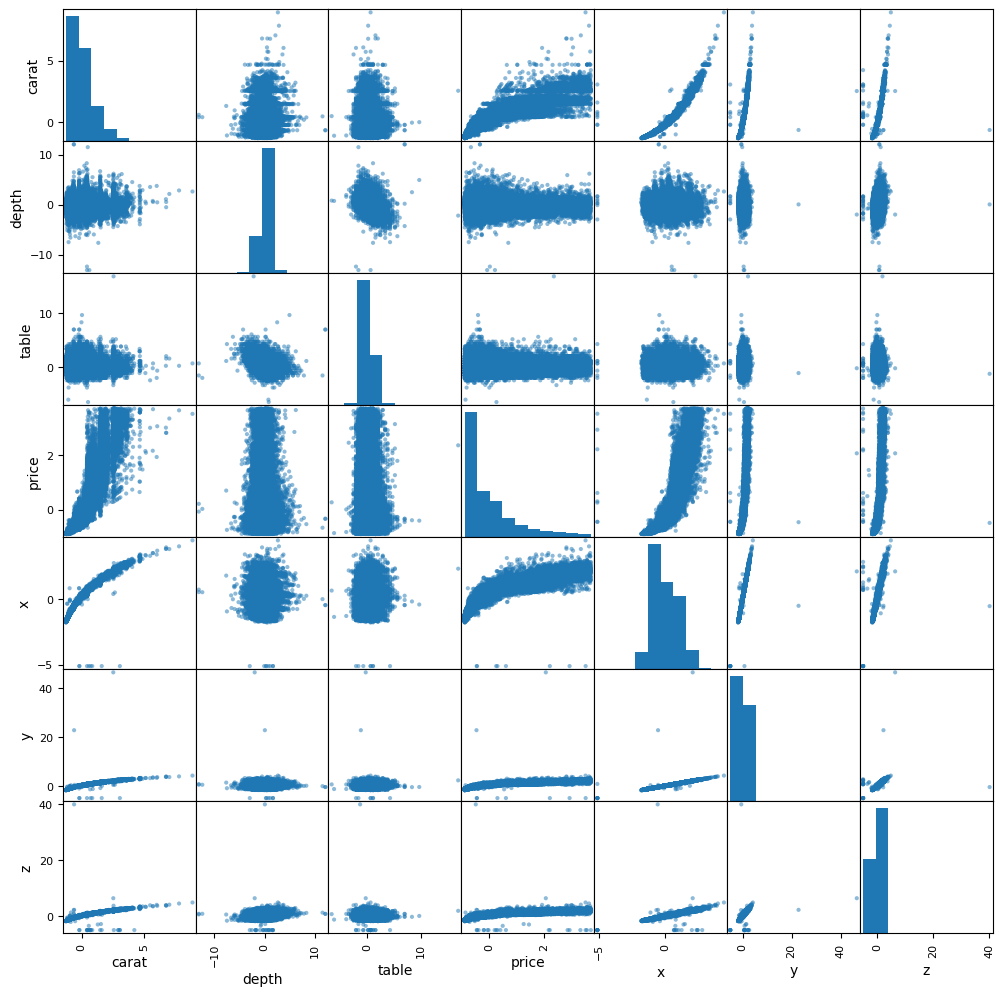

In [13]:
from pandas.plotting import scatter_matrix

# Create the scatter matrix plot
# scatter_matrix(data[numerical_columns], figsize=(12, 12))
scatter_matrix(diamonds_data_standardized, figsize=(12, 12))
plt.show()

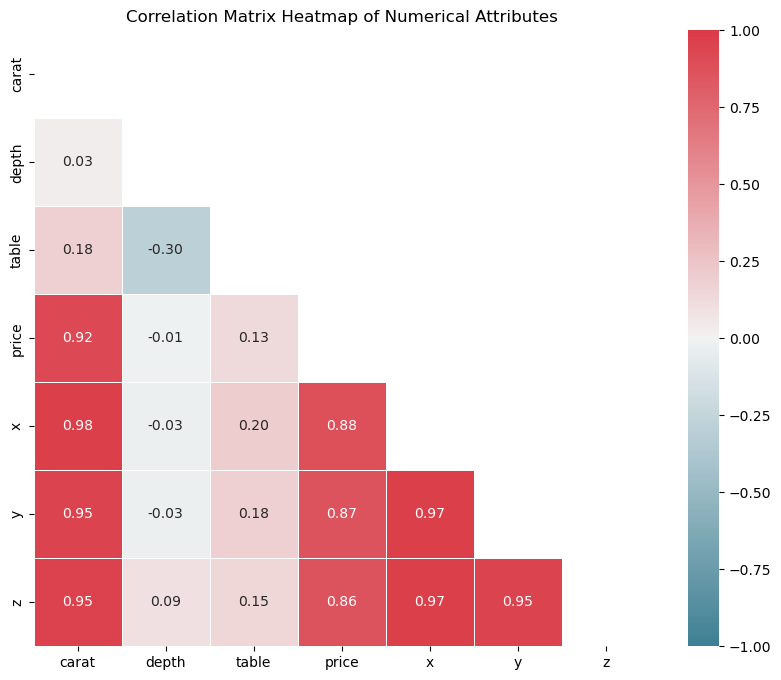

In [14]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr_matrix = diamonds_data_standardized.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap (optional)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap=cmap, 
    vmax=1, 
    vmin=-1, 
    center=0,
    annot=True,     # Annotate cells with correlation coefficients
    fmt=".2f",      # Format annotations to two decimal places
    square=True, 
    linewidths=.5
)

# Set the title
plt.title('Correlation Matrix Heatmap of Numerical Attributes')

# Show the plot
plt.show()


### PCA

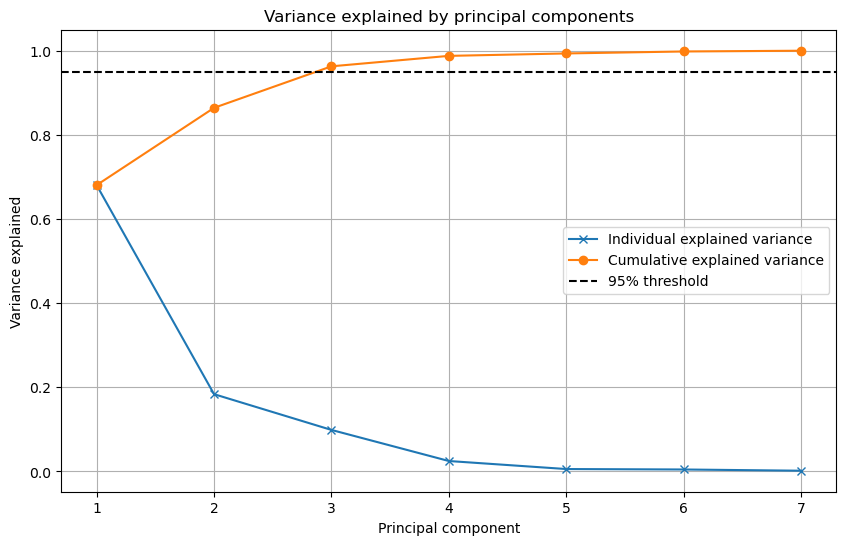

,Principal Component,Variance Explained,Cumulative Variance Explained
0,PC1,0.680559,0.680559
1,PC2,0.183695,0.864255
2,PC3,0.098687,0.962942
3,PC4,0.024822,0.987764
4,PC5,0.005758,0.993522
5,PC6,0.004707,0.998229
6,PC7,0.001771,1.000000


In [30]:
from scipy.linalg import svd

# PCA using SVD
U, S, Vt = svd(diamonds_data_standardized, full_matrices=False)

# variance explained by each principal component
rho = (S ** 2) / np.sum(S ** 2)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rho) + 1), rho, 'x-', label='Individual explained variance')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), 'o-', label='Cumulative explained variance')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% threshold')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend()
plt.grid(True)
plt.show()


# display variance and cumulative variance in a table
variance_data = {
    'Principal Component': [f'PC{i+1}' for i in range(len(rho))],
    'Variance Explained': rho,
    'Cumulative Variance Explained': np.cumsum(rho)
}

variance_df = pd.DataFrame(variance_data)

display(variance_df)

In [31]:
# Print the principal directions (Vt)
print("Principal directions (Vt):\n", Vt)

# Show in a table
pc_df = pd.DataFrame(Vt.T, index=numerical_columns, columns=[f'PC{i+1}' for i in range(Vt.shape[0])])
pc_df



Principal directions (Vt):
 [[ 0.45244549 -0.00091613  0.09951609  0.42551927  0.45321251  0.4472649
   0.44595366]
 [-0.03469601 -0.73067971  0.67506738 -0.03525794  0.00351255  0.00215791
  -0.08903518]
 [-0.00549481  0.67282929  0.72806947 -0.10544948 -0.03950882 -0.05418879
   0.03960344]
 [-0.06835945 -0.047248   -0.0595406  -0.84977817  0.24299509  0.32846061
   0.31700727]
 [ 0.13399948 -0.08873829 -0.01037614 -0.05377206  0.08898016 -0.77405793
   0.60339656]
 [ 0.76815114  0.01445027 -0.02526831 -0.27330947  0.19846061 -0.21526655
  -0.4986704 ]
 [-0.42588029  0.05560026  0.00204926  0.08281429  0.82865822 -0.20885709
  -0.27995794]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
carat,0.452445,-0.034696,-0.005495,-0.068359,0.133999,0.768151,-0.425880
depth,-0.000916,-0.730680,0.672829,-0.047248,-0.088738,0.014450,0.055600
table,0.099516,0.675067,0.728069,-0.059541,-0.010376,-0.025268,0.002049
price,0.425519,-0.035258,-0.105449,-0.849778,-0.053772,-0.273309,0.082814
x,0.453213,0.003513,-0.039509,0.242995,0.088980,0.198461,0.828658
y,0.447265,0.002158,-0.054189,0.328461,-0.774058,-0.215267,-0.208857
z,0.445954,-0.089035,0.039603,0.317007,0.603397,-0.498670,-0.279958


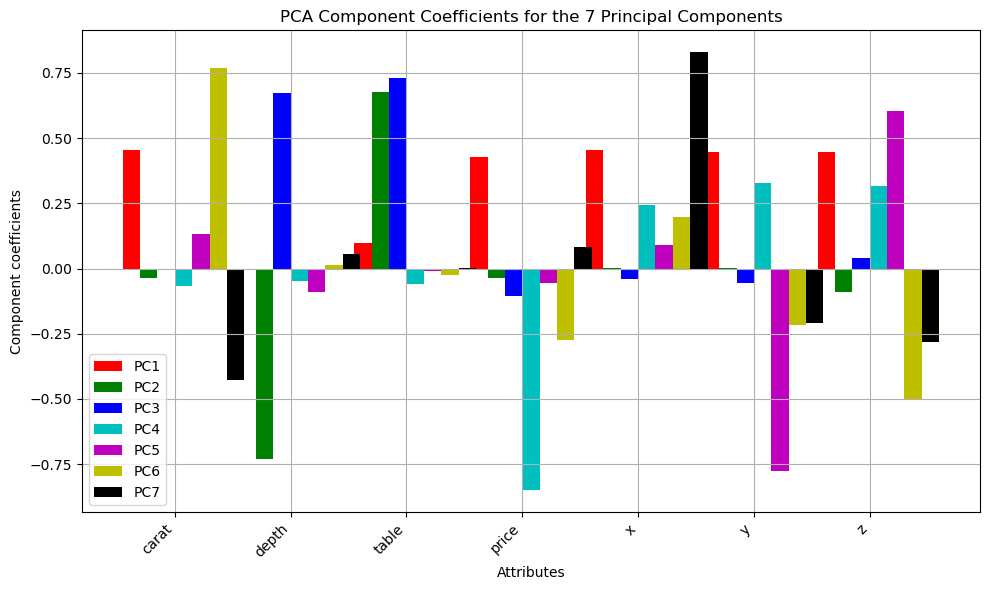

In [33]:
# Transpose Vt to get PC directions
V = Vt.T

pcs = [0, 1, 2, 3, 4, 5, 6] 

# plotting
M = diamonds_data_standardized.shape[1] 
attribute_names = numerical_columns  
legend_strs = [f"PC{e+1}" for e in pcs]  
bw = 0.15 
r = np.arange(1, M + 1) 
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] 

plt.figure(figsize=(10, 6))
for i, pc in enumerate(pcs):
    plt.bar(r + i * bw, V[:, pc], width=bw, color=colors[i], label=f"PC{pc+1}")

plt.xticks(r + bw * 2.5, attribute_names, rotation=45, ha="right")
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.title("PCA Component Coefficients for the 7 Principal Components")
plt.legend(legend_strs)
plt.grid(True)
plt.tight_layout()

plt.show()

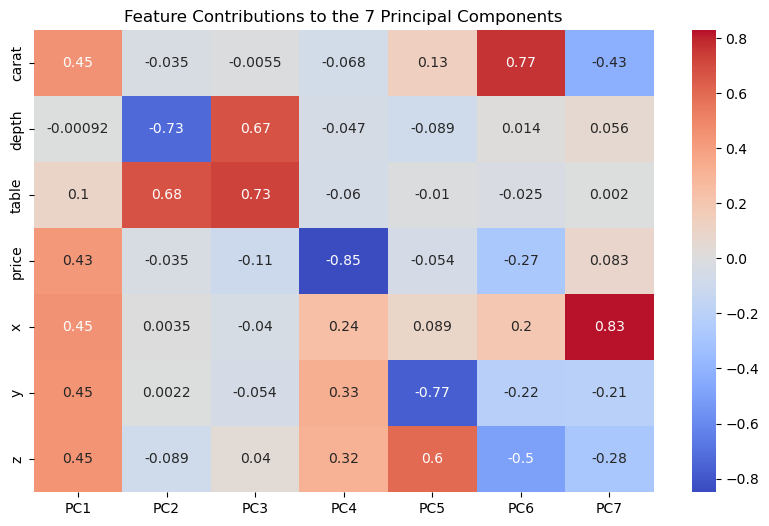

In [38]:
# Create heatmap
pc_contributions = pd.DataFrame(V[:, pcs], index=attribute_names, columns=[f"PC{i+1}" for i in pcs])

plt.figure(figsize=(10, 6))
sns.heatmap(pc_contributions, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Contributions to the 7 Principal Components")
plt.show()

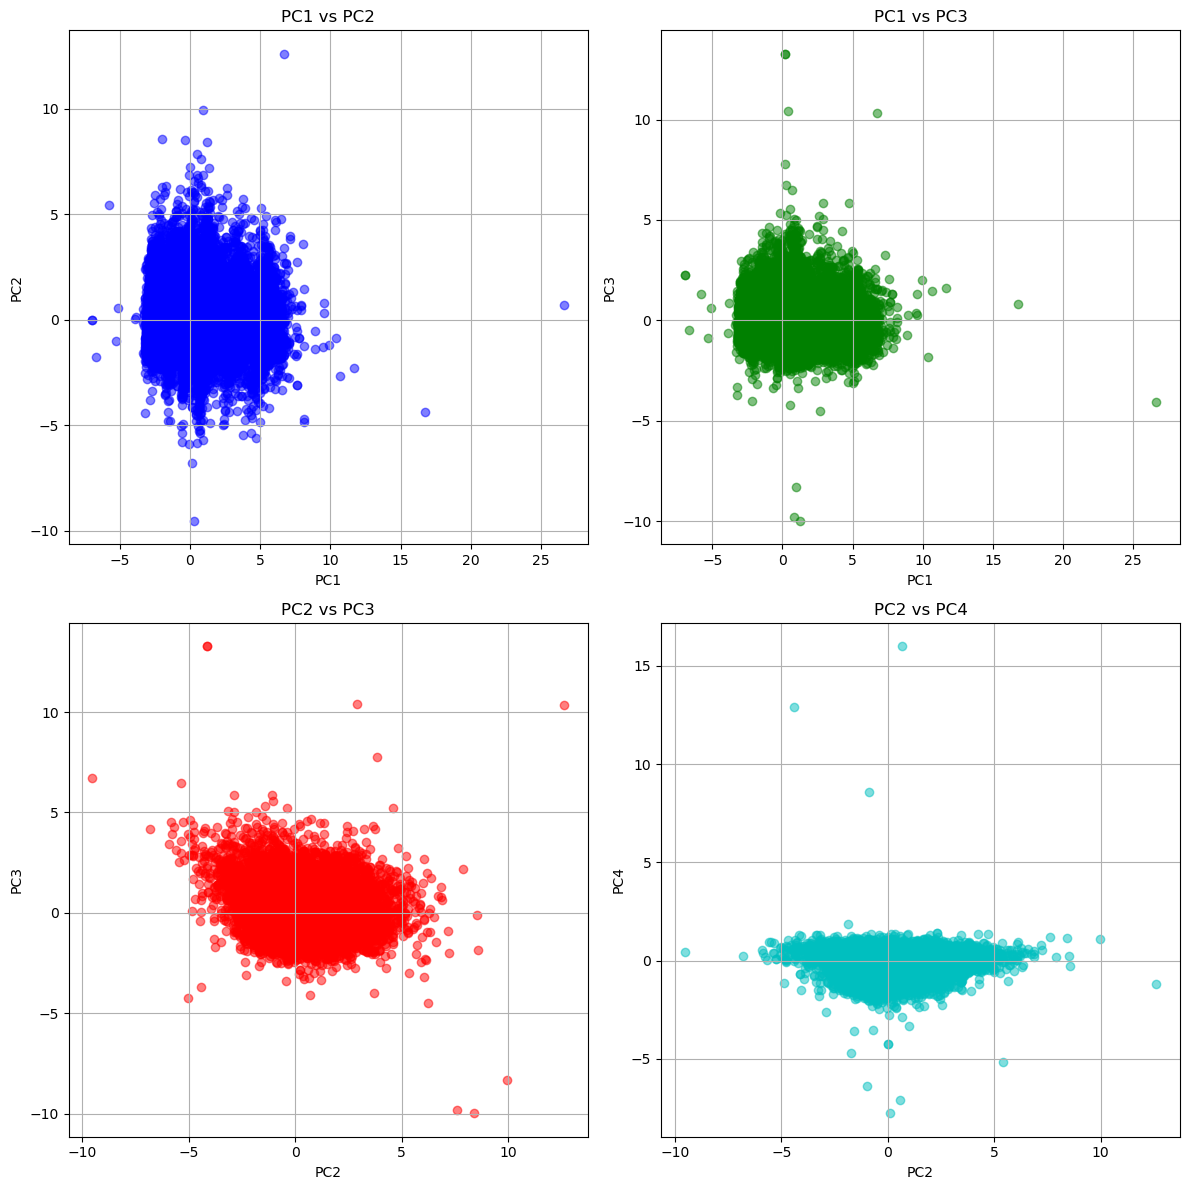

In [35]:
# project data onto some of the PCs
Z = np.dot(diamonds_data_standardized, V[:, pcs])

plt.figure(figsize=(12, 12))

# PC1 vs PC2
plt.subplot(2, 2, 1)
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5, c='b')
plt.title("PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# PC1 vs PC3
plt.subplot(2, 2, 2)
plt.scatter(Z[:, 0], Z[:, 2], alpha=0.5, c='g')
plt.title("PC1 vs PC3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.grid(True)

# PC2 vs PC3
plt.subplot(2, 2, 3)
plt.scatter(Z[:, 1], Z[:, 2], alpha=0.5, c='r') 
plt.title("PC2 vs PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.grid(True)

# PC2 vs PC4
plt.subplot(2, 2, 4)
plt.scatter(Z[:, 1], Z[:, 3], alpha=0.5, c='c')
plt.title("PC2 vs PC4")
plt.xlabel("PC2")
plt.ylabel("PC4")
plt.grid(True)

plt.tight_layout()
plt.show()

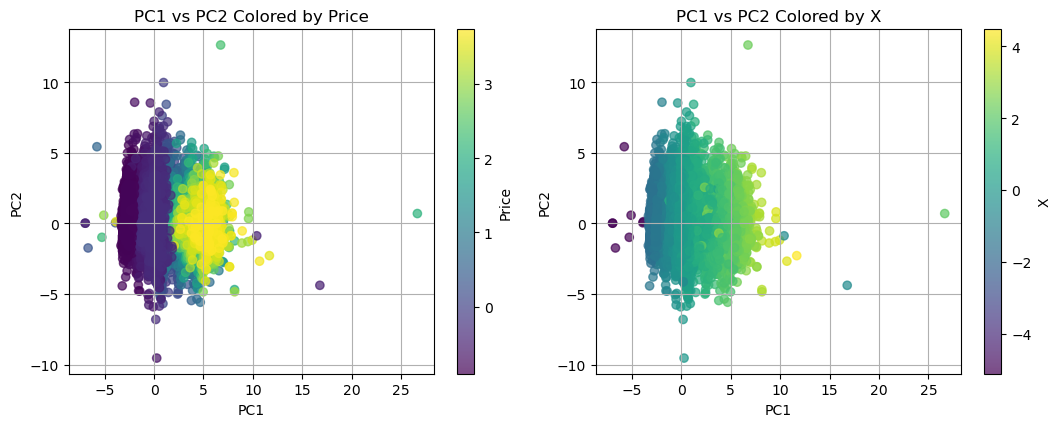

In [41]:
# Plot PC1 vs PC2 colored by price and x

numerical_features_to_plot = ['price', 'x']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features_to_plot):
    plt.subplot(3, 3, i + 1)  # Create subplots
    scatter = plt.scatter(Z[:, 0], Z[:, 1], c=diamonds_data_standardized[feature], cmap='viridis', alpha=0.7)
    plt.title(f"PC1 vs PC2 Colored by {feature.capitalize()}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    cbar = plt.colorbar(scatter)
    cbar.set_label(feature.capitalize())

plt.tight_layout()
plt.show()



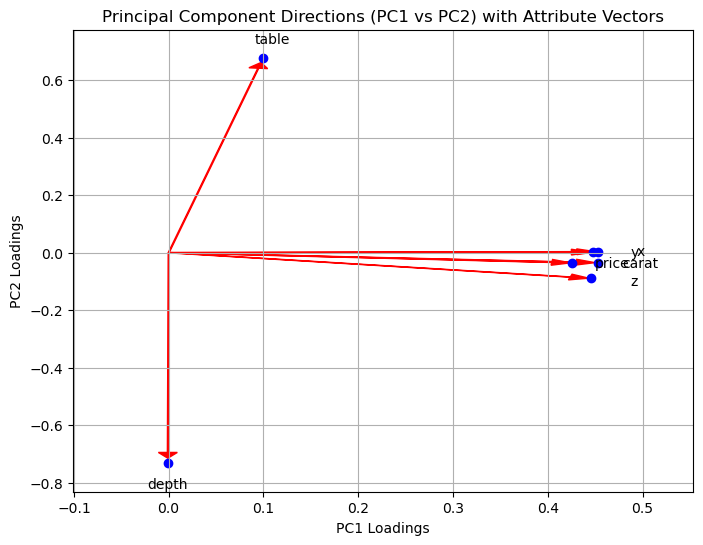

In [42]:
pc1_loadings = V[:, 0] 
pc2_loadings = V[:, 1]

# Scale vectors
scaling_factor = 0.95

plt.figure(figsize=(8, 6))

# Add vectors for each attribute from (0,0))
for i, feature in enumerate(attribute_names):
    # Draw vectors
    plt.arrow(0, 0, pc1_loadings[i] * scaling_factor, pc2_loadings[i] * scaling_factor, 
              head_width=0.02, head_length=0.02, fc='r', ec='r')

    # Draw dots
    plt.scatter(pc1_loadings[i], pc2_loadings[i], color='b')

    # Add labels
    plt.text(pc1_loadings[i] * 1.1, pc2_loadings[i] * 1.1, feature, ha='center', va='center', fontsize=10)

plt.xlim(min(pc1_loadings) - 0.1, max(pc1_loadings) + 0.1)
plt.ylim(min(pc2_loadings) - 0.1, max(pc2_loadings) + 0.1)

plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Principal Component Directions (PC1 vs PC2) with Attribute Vectors')

plt.grid(True)

plt.show()